# How lucky and unlucky numbers can play a vital role in determining your property values 

Numerical superstitious beliefs are wide spread in Asian countries and have a powerful impact in decision-making, from choosing a license plate or mobile number to making momentous decisions, such as buying a house. People who have been immersed in Asian culture tend to believe that things associated with the "lucky numbers" can also bring them good luck.

For example eight is considered the luckiest number because it sounds like "wealth" in Chinese. Four, on the other side, is often deemed as an inauspicious number because it sounds like the Chinese word for death. 

With the surge of Chinese buyers in the U.S. housing market, properties related to auspicious numbers might be more appealing to buyers, and vice versa. I want to examine the U.S. housing data to see whether the street number or the apartment number could affect the property values. My hypothesis is that in markets with more ethnic Chinese and Taiwanese buyers, average price of houses with street addresses ending or starting with the unlucky number four will be lower while that with the lucky number eight will be higher.

data source: https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page

To see the same analysis done on one family dewellings in New York, please go to this link: https://nbviewer.jupyter.org/github/sabrinamochi/jupyter-properties-addr-number/blob/master/neighborhood-housing-analysis-addr-number.ipynb

In [199]:
import pandas as pd
import re
from pandas.api.types import is_string_dtype
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")

I decided to focus on New York in my initial analysis. 

New York is an ideal setting for this project because it has been destinations for Chinese immigrants since the 1830s and home to the largest ethnic Chinese population in the United States. 

I analyzed housing data between 2012 and 2019 from NYC department of Finance. 

In [213]:
years = ["2012", "2013", "2014", "2016", "2017", "2018", "2019"]

si = pd.read_excel("nyc-gov-rolling-sales-data/2015_statenisland.xls", header=4)
bx = pd.read_excel("nyc-gov-rolling-sales-data/2015_bronx.xls", header=4)
bk = pd.read_excel("nyc-gov-rolling-sales-data/2015_brooklyn.xls", header=4)
mt = pd.read_excel("nyc-gov-rolling-sales-data/2015_manhattan.xls", header=4)
qn = pd.read_excel("nyc-gov-rolling-sales-data/2015_queens.xls", header=4)
df_o = pd.concat([si, bx, bk, mt, qn]).reset_index(drop=True)
    
for i in years:
    if i == "2018" or i == "2019": 
        si = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_statenisland.xlsx", header=4)
        bx = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_bronx.xlsx", header=4)
        bk = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_brooklyn.xlsx", header=4)
        mt = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_manhattan.xlsx", header=4)
        qn = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_queens.xlsx", header=4)
    else: 
        si = pd.read_excel("nyc-gov-rolling-sales-data/"+ i + "_statenisland.xls", header=4)
        bx = pd.read_excel("nyc-gov-rolling-sales-data/"+ i +"_bronx.xls", header=4)
        bk = pd.read_excel("nyc-gov-rolling-sales-data/"+ i +"_brooklyn.xls", header=4)
        mt = pd.read_excel("nyc-gov-rolling-sales-data/"+ i +"_manhattan.xls", header=4)
        qn = pd.read_excel("nyc-gov-rolling-sales-data/"+ i +"_queens.xls", header=4)

    df_o = pd.concat([df_o, si, bx, bk, mt, qn]).reset_index(drop=True)

In [214]:
df_o.head()

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,TAX CLASS AS OF FINAL ROLL 17/18,BUILDING CLASS AS OF FINAL ROLL 17/18,TAX CLASS AS OF FINAL ROLL 18/19,BUILDING CLASS AS OF FINAL ROLL 18/19
0,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5394.0,4.0,,A2,26 FINGAL STREET,,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5397.0,51.0,,A1,23 EYLANDT STREET,,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5401.0,5.0,,A2,28 JANSEN STREET,,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5402.0,43.0,,A1,295 HAROLD AVENUE,,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404.0,46.0,,A1,119 LENZIE STREET,,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [215]:
df_o.columns = [k.replace('\n', '') for k in df_o.columns]

In [238]:
df = df_o.copy()

In [239]:
print("Number of records: " + str(df_o.shape))

Number of records: (773881, 46)


In [240]:
df = df.loc[:, ~df.columns.duplicated()]

In [241]:
df["BUILDING CLASS CATEGORY"].unique()

array(['01  ONE FAMILY DWELLINGS                    ',
       '02  TWO FAMILY DWELLINGS                    ',
       '05  TAX CLASS 1 VACANT LAND                 ',
       '06  TAX CLASS 1 - OTHER                     ',
       '21  OFFICE BUILDINGS                        ',
       '36  OUTDOOR RECREATIONAL FACILITIES         ',
       '04  TAX CLASS 1 CONDOS                      ',
       '03  THREE FAMILY DWELLINGS                  ',
       '07  RENTALS - WALKUP APARTMENTS             ',
       '31  COMMERCIAL VACANT LAND                  ',
       '32  HOSPITAL AND HEALTH FACILITIES          ',
       '10  COOPS - ELEVATOR APARTMENTS             ',
       '13  CONDOS - ELEVATOR APARTMENTS            ',
       '29  COMMERCIAL GARAGES                      ',
       '39  TRANSPORTATION FACILITIES               ',
       '41  TAX CLASS 4 - OTHER                     ',
       '22  STORE BUILDINGS                         ',
       '14  RENTALS - 4-10 UNIT                     ',
       '27

To analyze whether floor numbers would affect property values, I focus on elevator apartments data only. 

In [242]:
df = df[(df["BUILDING CLASS CATEGORY"] == "10  COOPS - ELEVATOR APARTMENTS             ") 
        | (df["BUILDING CLASS CATEGORY"] == "13  CONDOS - ELEVATOR APARTMENTS            ")
       |  (df["BUILDING CLASS CATEGORY"] == "10 COOPS - ELEVATOR APARTMENTS             ")
       | (df["BUILDING CLASS CATEGORY"] == "13 CONDOS - ELEVATOR APARTMENTS            ")
       | (df["BUILDING CLASS CATEGORY"] == "10 COOPS - ELEVATOR APARTMENTS")
       | (df["BUILDING CLASS CATEGORY"] == "13 CONDOS - ELEVATOR APARTMENTS")]

In [243]:
df.shape

(208622, 25)

### Data Examination

In [244]:
print("There are "+ str(len(df.columns)) +" columns in the dataset.")

There are 25 columns in the dataset.


In [245]:
# inspect null values
df.isnull().sum()

BOROUGH                                       0
NEIGHBORHOOD                                  0
BUILDING CLASS CATEGORY                       0
TAX CLASS AT PRESENT                      76125
BLOCK                                         0
LOT                                           0
EASE-MENT                                 49081
BUILDING CLASS AT PRESENT                 76125
ADDRESS                                       0
APARTMENT NUMBER                          25803
ZIP CODE                                      0
RESIDENTIAL UNITS                         13207
COMMERCIAL UNITS                          13207
TOTAL UNITS                               13207
LAND SQUARE FEET                          13207
GROSS SQUARE FEET                         13207
YEAR BUILT                                 2540
TAX CLASS AT TIME OF SALE                     0
BUILDING CLASS AT TIME OF SALE                0
SALE PRICE                                    0
SALE DATE                               

In [246]:
# inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208622 entries, 534 to 773829
Data columns (total 25 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   BOROUGH                                208622 non-null  float64       
 1   NEIGHBORHOOD                           208622 non-null  object        
 2   BUILDING CLASS CATEGORY                208622 non-null  object        
 3   TAX CLASS AT PRESENT                   132497 non-null  object        
 4   BLOCK                                  208622 non-null  float64       
 5   LOT                                    208622 non-null  float64       
 6   EASE-MENT                              159541 non-null  object        
 7   BUILDING CLASS AT PRESENT              132497 non-null  object        
 8   ADDRESS                                208622 non-null  object        
 9   APARTMENT NUMBER                       182819 

I made all neighborhood names lower case and stripped extra white space.

In [247]:
df["NEIGHBORHOOD"] = df["NEIGHBORHOOD"].apply(lambda x: x.lower())
df["NEIGHBORHOOD"] = df["NEIGHBORHOOD"].apply(lambda x: x.rstrip(' '))

Remove outliers:

In [248]:
def rmOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    df_out = df[~((df[[column]] < (Q1 - 1.5 * IQR)) |(df[[column]] > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(df_out.shape)
    return df_out

In [249]:
df = rmOutliers(df, "SALE PRICE")
# df = rmOutliers(df, "GROSS SQUARE FEET")

883474.75
(189134, 25)


In [250]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,189134.000000,189134.000000,189134.000000,189134.000000,176674.000000,176674.000000,176674.000000,1.766740e+05,1.766740e+05,186869.000000,189134.0,1.891340e+05
mean,2.189125,2561.025701,681.753112,10570.719368,0.793116,0.007302,0.827790,6.594818e+02,4.170493e+02,1738.855733,2.0,5.656760e+05
std,1.297415,2515.535367,862.461300,794.317531,13.750636,0.332111,13.909625,1.581691e+04,1.898845e+04,622.143041,0.0,5.538441e+05
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,2.0,0.000000e+00
25%,1.000000,1008.000000,22.000000,10022.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1928.000000,2.0,1.400000e+05
50%,1.000000,1495.000000,150.000000,10280.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1957.000000,2.0,4.130000e+05
75%,3.000000,3343.000000,1135.000000,11230.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1973.000000,2.0,8.300000e+05
max,5.000000,16234.000000,9117.000000,11694.000000,1844.000000,22.000000,1866.000000,4.228300e+06,3.750565e+06,2019.000000,2.0,2.375000e+06


To lesson impacts by other factors, I decided to focus on condos under 1,000 sqft.

In [251]:
df = df[(df["GROSS SQUARE FEET"] <= 1000)]

In [252]:
df.shape

(172905, 25)

The top neighborhoods that have the most postings:

In [253]:
df.NEIGHBORHOOD.value_counts()

upper east side (59-79)    9267
upper east side (79-96)    8508
flushing-north             7777
midtown east               7448
upper west side (59-79)    7005
                           ... 
woodhaven                     6
manhattan-unknown             3
crotona park                  3
red hook                      1
springfield gardens           1
Name: NEIGHBORHOOD, Length: 178, dtype: int64

In [278]:
print("Mean price of condos under 1,000 sqft: " + str(df["SALE PRICE"].mean()))

Mean price of condos under 1,000 sqft: 564593.2438911541


<!-- Average Price and size are a lot higher than median rent and size, indicating that these columns have some outliers. -->

### Areas with large Chinese-American populations

The three largest Chinatowns in NYC lie in Brooklyn, Manhattan and Queens. To examine whether houses related to auspicious and inauspicious numbers have higher or lower property values, I wanted to pay close attention to areas with significant Chinese-American populations.

I downloaded the demographic dataset from NYC department of city planning.

In [255]:
# data source: https://www1.nyc.gov/site/planning/planning-level/nyc-population/american-community-survey.page
nydemo = pd.read_csv("nyneighborhood-demo.csv")

In [256]:
nydemo.head()

,GeogName,Borough,AsnChiNoTE,AsnChiNoTM,AsnChiNoTC,AsnChiNoTP,AsnChiNoTZ
0,Allerton-Pelham Gardens,Bronx,444,230,31.5,13.8,6.7
1,Bedford Park-Fordham North,Bronx,157,123,47.6,6.8,5.1
2,Belmont,Bronx,97,62,38.8,14.3,7.9
3,Bronxdale,Bronx,128,107,50.8,10.5,8.2
4,Claremont-Bathgate,Bronx,0,NaN,NaN,NaN,NaN


In [257]:
# lowercase
nydemo["GeogName"] = nydemo["GeogName"].apply(lambda x: x.lower())

In [258]:
sortedNydemo = nydemo.sort_values(by=["AsnChiNoTP"], ascending=False).reset_index(drop=True)

In [259]:
# I focus on the column indicating percentage of Chinese population
sortedNydemo = sortedNydemo[["GeogName", "Borough", "AsnChiNoTP"]]

Before merging the two datasets together, I have to align the naming of the neighborhoods.

In [260]:
for i in df.NEIGHBORHOOD.unique():
    if i.split()[:3] == "upper east side":
        df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, "upper east side")
    elif i.split()[:3] == "upper west side":
        df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, "upper west side")
    elif i == "flatiron":
        df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, 'hudson yards-chelsea-flat iron-union square')
    for j in nydemo.GeogName.unique():
        if i in j:
            df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, j)
        elif j in i:
            df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, j)
        elif i.split()[0] in j:
            df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, j)
        elif i.split("/")[0] in j:
            df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, j)
        elif i.split("-")[0] in j:
            df.NEIGHBORHOOD = df.NEIGHBORHOOD.replace(i, j)

In [261]:
df.NEIGHBORHOOD.value_counts()

upper east side-carnegie hill                  32189
midtown-midtown south                          13481
east flushing                                   8622
murray hill-kips bay                            6431
hudson yards-chelsea-flat iron-union square     5512
                                               ...  
bellerose                                         16
park-cemetery-etc-queens                           8
woodhaven                                          6
cypress hills-city line                            6
springfield gardens north                          1
Name: NEIGHBORHOOD, Length: 114, dtype: int64

In [281]:
ls = []
for i in df.NEIGHBORHOOD.unique():
    if i not in nydemo.GeogName.unique():
        ls.append(i)
print("Neighborhood names that are not included in the demographic dataset from NYC department of city planning: ")
print(ls)

Neighborhood names that are not included in the demographic dataset from NYC department of city planning: 
['clove lakes', 'grant city', 'tompkinsville', 'wyckoff heights', 'alphabet city', 'fashion', 'financial', 'greenwich village-central', 'greenwich village-west', 'javits center', 'southbridge', 'beechhurst', 'navy yard']


Merge the two datasets so we can have percentage of Chinese population in the housing dataset.

In [263]:
merged = pd.merge(df, nydemo,  how='inner', left_on=['NEIGHBORHOOD'], right_on = ['GeogName'])

In [264]:
merged.shape

(162061, 32)

In [265]:
sortedMerged = merged.sort_values(by = ["AsnChiNoTP"], ascending=False).reset_index(drop=True)

### Find out address ending number

In [267]:
def endingNumAndPrice(df):
    df["number"] = df.ADDRESS.apply(lambda x: x.split(" ")[-1])
    df["number"] = df.number.apply(lambda x: x.lstrip("#"))
    df["number"] = df.number.apply(lambda x: re.sub("[\-A-Za-z]", '', x))
    #Address number that ends with four:
    df["floornum_end_four"] = df.number.str[-1]=="4"
    
    #Address number that ends without four:
    df["floornum_end_withoutFour"] = df.number.str[-1]!="4"
    
    #Address number that ends with eight:
    df["floornum_end_eight"] = df.number.str[-1]=="8"
    
    #Address number that ends with eight:
    df["floornum_end_withoutEight"] = df.number.str[-1]!="8"
    
    total = df.shape[0]
    aptWithFour = df[df["floornum_end_four"]==True]
    aptWithEight = df[df["floornum_end_eight"]==True]
    aptWithoutFour = df[df["floornum_end_withoutFour"]==True]
    aptWithoutEight = df[df["floornum_end_withoutEight"]==True]
    wFourP = round(aptWithFour.shape[0] / total, 2)
    wEightP = round(aptWithEight.shape[0] / total, 2)
    withoutFourP = round(aptWithoutFour.shape[0] / total, 2)
    withoutEightP = round(aptWithoutEight.shape[0] / total, 2)
    
    print("Houses with floor number that ends with four has " + str(aptWithFour.shape[0]) + " observations, making up " + str(wFourP) + " of the total observations.")
    print("Houses with floor number that ends without four has " + str(aptWithoutFour.shape[0]) + " observations, making up " + str(withoutFourP) + " of the total observations.")
    print("Houses with floor number that ends with Eight has " + str(aptWithEight.shape[0]) + " observations, making up "+ str(wEightP) + " of the total observations.")
    print("Houses with floor number that ends without Eight has " + str(aptWithoutEight.shape[0]) + " observations, making up "+ str(withoutEightP) + " of the total observations.")
    
    print("Mean price of all apt: "+ str(round(df["SALE PRICE"].mean())))
    print("Mean price of apt floor num ending with four: "+ str(round(aptWithFour["SALE PRICE"].mean())))
    print("Mean price of apt floor num ending without four: "+ str(round(aptWithoutFour["SALE PRICE"].mean())))
    print("Mean price of apt floor num ending with eight: "+ str(round(aptWithEight["SALE PRICE"].mean())))
    print("Mean price of apt floor num ending without eight: "+ str(round(aptWithoutEight["SALE PRICE"].mean())))
    return df

In [268]:
sortedMerged = endingNumAndPrice(sortedMerged)

Houses with floor number that ends with four has 4327 observations, making up 0.03 of the total observations.
Houses with floor number that ends without four has 157734 observations, making up 0.97 of the total observations.
Houses with floor number that ends with Eight has 1796 observations, making up 0.01 of the total observations.
Houses with floor number that ends without Eight has 160265 observations, making up 0.99 of the total observations.
Mean price of all apt: 551330
Mean price of apt floor num ending with four: 542873
Mean price of apt floor num ending without four: 551562
Mean price of apt floor num ending with eight: 672328
Mean price of apt floor num ending without eight: 549974


Drop rows with no address number:

In [269]:
noNan = sortedMerged.dropna(subset=['number'])

Create a function to calculate the ratio between the avg price of condos with floor number ending in 4 and that ending without 4.

In [270]:
def comparePrice(df, column, number):
    grouped = df.groupby(["NEIGHBORHOOD", column])
    moreThan10 = grouped.filter(lambda x: x["BOROUGH"].count() >= number)
    moreThan10Mean = moreThan10.groupby(["NEIGHBORHOOD", column]).mean()
    moreThan10MeanDf = moreThan10Mean.add_suffix('_Mean').reset_index()
    moreThan10MeanDf["ratio"] = moreThan10MeanDf.groupby("NEIGHBORHOOD")["SALE PRICE_Mean"].apply(lambda x: x/x.shift(1))
    moreThan10MeanDfVariance = moreThan10MeanDf[moreThan10MeanDf[column]==True]
    return moreThan10MeanDfVariance

In [271]:
four = comparePrice(noNan, "floornum_end_four", 10) # select neighborhoods that have at least 10 sales records

Each dot represents one neighborhood. The x axis indicates the percentage of Chinese population and the y axis represents the ratio of dividing the avg price of condos with floor number ending in 4 by that of condos with floor number ending without 4.

In [282]:
fig = px.scatter(four, x="AsnChiNoTP_Mean", y="ratio", 
                hover_data=['NEIGHBORHOOD'],
                labels={
                     "AsnChiNoTP_Mean": "% of Chinese population by neighborhood",
                     "ratio": "Ratio  by neighborhood",
                 },
                title="Relationship between % of Chinese population and avg price ratio of condos(with and without four)")
fig.show()

We can tell from the graph that neighborhoods with more Chinese population have smaller ratio, suggesting that on averge, condos with floor number ending in 4 have a lower price than that ending without 4. 

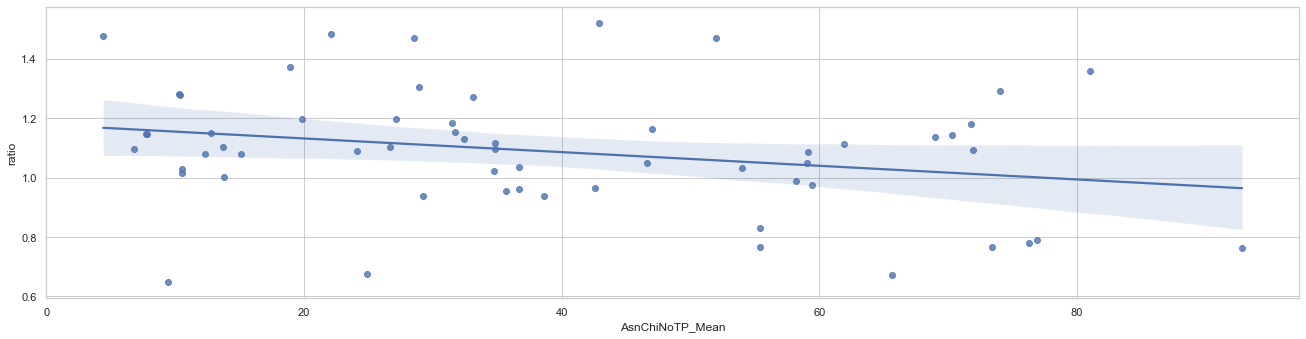

In [273]:
plt.figure(figsize=(20,5))
ax = sns.regplot( x="AsnChiNoTP_Mean", y="ratio", data=four)
# ax.set(ylim=(-0.4, 0.4))

Applying the same function to calculate avg price of condos with floor number ending in 8 and that ending without 8.

In [274]:
eight = comparePrice(noNan, "floornum_end_eight", 10)

In [283]:
fig = px.scatter(eight, x="AsnChiNoTP_Mean", y="ratio", 
                hover_data=['NEIGHBORHOOD'],
                labels={
                     "AsnChiNoTP_Mean": "% of Chinese population by neighborhood",
                     "ratio": "Ratio  by neighborhood",
                 },
                title="Relationship between % of Chinese population and avg price ratio of condos(with and without eight)")
fig.show()

On the other hand, in neighborhoods with more Chinese population, condos with floor number ending in 8 have a slightly higher price than that ending without 8. 

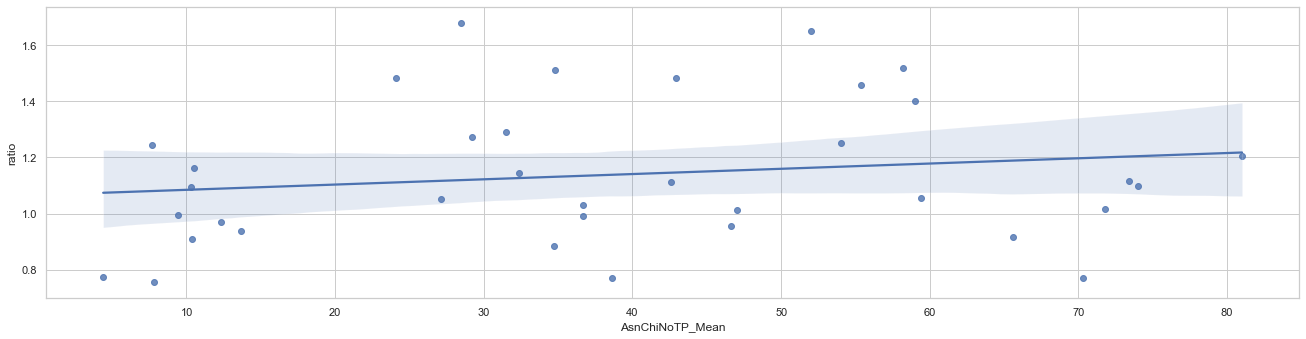

In [276]:
plt.figure(figsize=(20,5))
ax = sns.regplot( x="AsnChiNoTP_Mean", y="ratio", data=eight)
# ax.set(ylim=(-0.4, 0.4))

### Concerns

- Price could be affected by many factors: ex. renovations, views, transportation...

### Next Steps
- Put data point on map, color each data point by median price and observe whether other factors influence property values.
- Build a larger dataset with time seires to examine whether numeric superstitious beliefs have faded away.
- Research numeric superstitious beliefs in other cultures.